# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Load Original Data and Augment it to Generate New Data, and Provide Basic Summary of Data

**NOTE:** It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [1]:
# Import useful libraries
import tensorflow as tf
import cv2
import random
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import glob
import matplotlib.image as mpimg
# Visualizations will be shown in the notebook.
%matplotlib inline

## Executed generate_data.ipynb to Generate Fake Data

In [2]:
# Load Original Data and Augment it to Generate New Data

#%run generate_data-with-HLS-RGB.ipynb #uncomment to generate new data

## Load Original Data

In [3]:
# Load pickled original data
training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# verfiy that the number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))


## Summary of Original Data

Number of total images in the original dataset = 51839
Number of total labels in the original dataset = 51839
Minimum number of labels in the original dataset = 270
Maximum number of labels in the original dataset = 3000


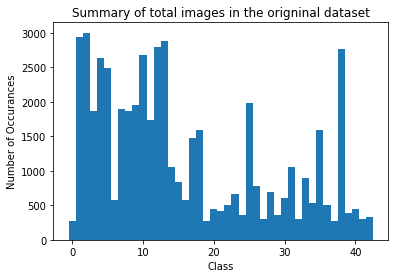

Number of training examples in the original dataset = 34799
Number of validation examples in the original dataset = 4410
Number of testing examples in the original dataset = 12630
Image data shape in the original dataset = (32, 32, 3)
Number of classes in the original dataset = 43


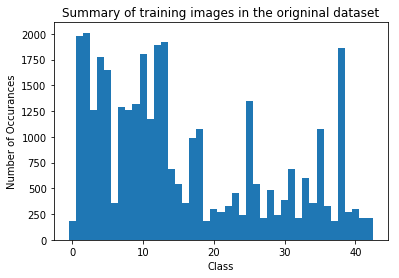

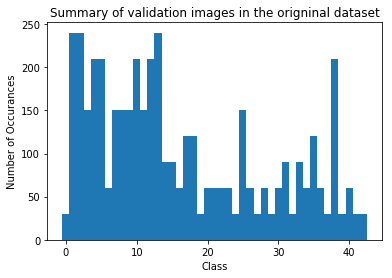

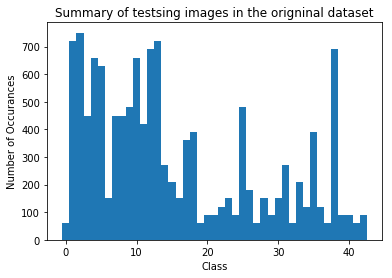

In [4]:
### Combine all the original data
X_combined = np.concatenate((X_train, X_valid, X_test), axis=0) # row wise
y_combined = np.concatenate((y_train, y_valid, y_test), axis=0) # row wise

### Summary of test data
unique1, counts1 = np.unique(y_combined, return_counts=True)

print('Number of total images in the original dataset =', len(X_combined))
print('Number of total labels in the original dataset =', len(y_combined))
print('Minimum number of labels in the original dataset =', np.min(counts1))
print('Maximum number of labels in the original dataset =', np.max(counts1))



plt.bar(unique1, counts1, 1)
plt.title('Summary of total images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

## Statistics of the original datasets
n_train = len(X_train)

# number of validation examples
n_validation = len(X_valid)

# number of testing examples.
n_test = len(X_test)

# what's the shape of an traffic sign image?
image_shape = X_train[0].shape

# how many unique classes/labels there are in the dataset.
n_classes = len(unique1)

print("Number of training examples in the original dataset =", n_train)
print("Number of validation examples in the original dataset =", n_validation)
print("Number of testing examples in the original dataset =", n_test)
print("Image data shape in the original dataset =", image_shape)
print("Number of classes in the original dataset =", n_classes)

### summary of training data
unique2, counts2 = np.unique(y_train, return_counts=True)
plt.bar(unique2, counts2, 1)
plt.title('Summary of training images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of validation data
unique3, counts3 = np.unique(y_valid, return_counts=True)
plt.bar(unique3, counts3, 1)
plt.title('Summary of validation images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of test data
unique4, counts4 = np.unique(y_test, return_counts=True)
plt.bar(unique4, counts4, 1)
plt.title('Summary of testsing images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

## Load New Data

In [5]:
# Load pickled new data

training_file = "../data/new_train_data.p"
validation_file= "../data/new_valid_data.p"
testing_file = "../data/new_test_data.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['X_train'], train['y_train']
X_valid, y_valid = valid['X_valid'], valid['y_valid']
X_test, y_test = test['X_test'], test['y_test']

# verfiy that the number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

## Summary of New Data

Number of total images in the new dataset = 129000
Number of total labels in the new dataset = 129000
Minimum number of labels in the new dataset = 3000
Maximum number of labels in the new dataset = 3000


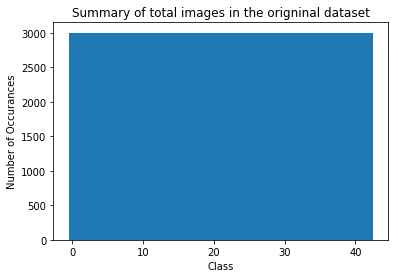

Number of training examples in the newly generated dataset = 77400
Number of validation examples in the newly generated dataset = 25800
Number of testing examples in the newly generated dataset = 25800
Image data shape in the newly generated dataset = (32, 32, 3)
Number of classes in the newly generated dataset = 43


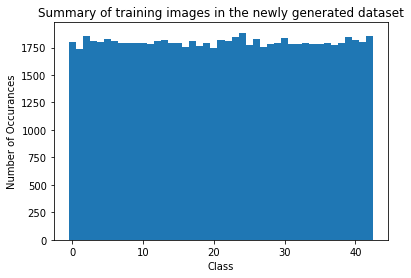

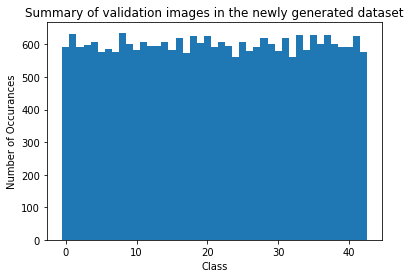

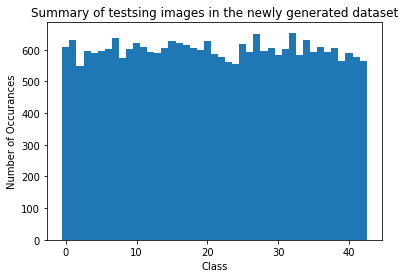

In [6]:
### Combine all the new data
X_combined = np.concatenate((X_train, X_valid, X_test), axis=0) # row wise
y_combined = np.concatenate((y_train, y_valid, y_test), axis=0) # row wise

### Summary of test data
unique1, counts1 = np.unique(y_combined, return_counts=True)

print('Number of total images in the new dataset =', len(X_combined))
print('Number of total labels in the new dataset =', len(y_combined))
print('Minimum number of labels in the new dataset =', np.min(counts1))
print('Maximum number of labels in the new dataset =', np.max(counts1))


plt.bar(unique1, counts1, 1)
plt.title('Summary of total images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()


## Statistics of the newly generated datasets
n_train = len(X_train)

# number of validation examples
n_validation = len(X_valid)

# number of testing examples.
n_test = len(X_test)

# what's the shape of an traffic sign image?
image_shape = X_train[0].shape

# how many unique classes/labels there are in the dataset.
n_classes = len(unique1)

print("Number of training examples in the newly generated dataset =", n_train)
print("Number of validation examples in the newly generated dataset =", n_validation)
print("Number of testing examples in the newly generated dataset =", n_test)
print("Image data shape in the newly generated dataset =", image_shape)
print("Number of classes in the newly generated dataset =", n_classes)

### summary of training data
unique2, counts2 = np.unique(y_train, return_counts=True)
plt.bar(unique2, counts2, 1)
plt.title('Summary of training images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of validation data
unique3, counts3 = np.unique(y_valid, return_counts=True)
plt.bar(unique3, counts3, 1)
plt.title('Summary of validation images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of test data
unique4, counts4 = np.unique(y_test, return_counts=True)
plt.bar(unique4, counts4, 1)
plt.title('Summary of testsing images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

39


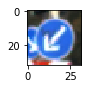

In [7]:
# select a random image from training data 
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# se matplotlib to visualize the image and print its label and see if the image and the label matches
print(y_train[index])
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
# convert color images into grayscale images
def color_2_grayscale(image_data):
    gray_image_data = np.zeros(image_data.shape[:-1])
    #gray_image_data = np.zeros([len(image_data), image_data[0].shape[0], image_data[0].shape[1], 1])
    for i in range(len(image_data)):
        gray_image_data[i] = cv2.cvtColor(image_data[i],cv2.COLOR_RGB2GRAY)
    gray_image_data =  np.float32(gray_image_data)
    gray_image_data = gray_image_data.reshape(len(image_data),image_data[0].shape[0], image_data[0].shape[1], 1)
    return gray_image_data

X_train = color_2_grayscale(X_train)
X_valid = color_2_grayscale(X_valid)
X_test = color_2_grayscale(X_test)
print(X_train.shape)

(77400, 32, 32, 1)


In [9]:
# normalize grayscale images between [-1, 1], to have 0 mean and unit standard deviation
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-1, 1]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    img_min = 0
    img_max = 255
    new_min = -1
    new_max = 1
    x1 = (image_data - img_min) / (img_max - img_min)
    x2 = x1 * (new_max - new_min)
    x2 = x2 + new_min
    return x2

X_train = normalize_grayscale(X_train)
X_valid = normalize_grayscale(X_valid)
X_test = normalize_grayscale(X_test)
#print(X_train.dtype) # uncomment to check data type of image
print(X_train.shape)

(77400, 32, 32, 1)


### Model Architecture

In [10]:
EPOCHS = 50
BATCH_SIZE = 128
rate = 0.0008
n_classes = 43

In [11]:
# define weight and biases for LeNet
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0 # mean of weights
sigma = 0.1 # standard deviation of weights

W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mu, sigma), name = "W1")# [height, width, input_depth, output_depth]
W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma), name = "W2") # [height, width, input_depth, output_depth]
W3 = tf.Variable(tf.truncated_normal([5*5*16, 120], mu, sigma), name = "W3") # [input_features, output_features]
W4 = tf.Variable(tf.truncated_normal([120, 84], mu, sigma), name = "W4") # [input_features, output_classes]
W5 = tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma), name = "W5") # [input_features, output_classes]

b1 = tf.Variable(tf.zeros(6), name = "b1") # depth of convolution
b2 = tf.Variable(tf.zeros(16), name = "b2") # depth of convolution
b3 = tf.Variable(tf.zeros(120), name = "b3") # number of output features in fully connected layer
b4 = tf.Variable(tf.zeros(84), name = "b4") # number of classes in output layer           
b5 = tf.Variable(tf.zeros(n_classes), name = "b5") # number of classes in output layer      
                 

In [12]:
# define Tensor Variables
# x stores our images
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # placeholder that will store our input batches
# here we take batch =  None, which allows the placeholder to later accept a btach of any size and 
# images size is set to 32 * 32 *1

# y stores our labels
y = tf.placeholder(tf.int32, (None)) # labels come through with sparse variables, which means that they are integers
# they are not one-hot encoded yet. 

dropout = tf.placeholder(tf.float32) 

one_hot_y = tf.one_hot(y, n_classes) # tf.one_hot() function to one-hot encode the labels

In [13]:
# define LeNet 
def LeNet(x, dropout):    
    strides = 1
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16, i.e., (H: (32 - 5 + 1)/1, W =(32 - 5 + 1)/1)
    conv1 = tf.nn.conv2d(x, W1, strides=[1, strides, strides, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #print(conv1)
    # TODO: Layer 2: Convolutional Input = 14x14x16 Output = 10x10x32.
    conv2 = tf.nn.conv2d(conv1, W2, strides=[1, strides, strides, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #print(conv2)
    # TODO: Flatten. Input = 5x5x32. Output = 800.
    fc1 = tf.reshape(conv2, [-1, W3.get_shape().as_list()[0]])
    # TODO: Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1 = tf.add(tf.matmul(fc1,W3), b3)
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1) 
    fc1 = tf.nn.dropout(fc1, dropout)
    #print(fc1)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, W4), b4)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2) 
    fc2 = tf.nn.dropout(fc2, dropout)
    #print(fc2)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3 = tf.add(tf.matmul(fc2, W5), b5)
    #print(fc3)
    logits = fc3
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
# pipeline for training
# learning rate
beta = 0.0001
# we set up our training pipeline here to train the model
logits = LeNet(x, dropout) # pass the input data to LeNet() to calculate our logits
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits) # tf.nn.softmax_cross_entropy_with_logits() 
#function is used to compare those logits to the ground truth labels and caculate the cross entropy
# cross entropy is a measure of how different the logits are from the ground truth training labels

# Loss function using L2 Regularization
loss_operation = tf.reduce_mean(cross_entropy + beta * tf.nn.l2_loss(W1) + beta * tf.nn.l2_loss(W2) +
    beta * tf.nn.l2_loss(W3) + beta * tf.nn.l2_loss(W4) + beta * tf.nn.l2_loss(W5)) 
loss_operation1 = tf.reduce_mean(cross_entropy) 
# tf.reduce_mean() function is used calculate the average cross entropy from all the training images
optimizer = tf.train.AdamOptimizer(learning_rate = rate) # tf.train.AdamOptimizer() function is used to minimize the loss 
# function similarly to what stochastic gradient descent does. The Adam algorithm is a little more sophisticated than stochastic
# gradeient descent, so its a good defualt choice for an optimizer. This where we use learning rate hyper-parameter
training_operation = optimizer.minimize(loss_operation) # we run the minimize function on the optimizer which uses backpropagation
# to update the network and minimize our training loss

In [15]:
# here we set evaluution pipeline to evaluute the model, i.e., how good the model is

# measure whether a given prediction is correct by comparing the logit prediction ot the one-hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# calculate the model's overall accuracy by averaging the individual prediciton accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# build evaluate functions to evaluate accuracy and loss
def evaluate(X_data, y_data, prob): # dataset as input
    num_examples = len(X_data) # number of samples in X_data
    total_accuracy = 0 
    total_loss = 0
    sess = tf.get_default_session()
    # batches the dataset and runs it through the evaluation pipeline for accuracy 
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation1, accuracy_operation], feed_dict={x: batch_x, y: batch_y, dropout: prob})
        total_accuracy += (accuracy * len(batch_x)) # add total accuracies for all the batches
        total_loss += (loss * len(batch_x))  # add total losses for all the batches
    accu = total_accuracy / num_examples
    los = total_loss / num_examples
    return los, accu  # returns the average accuracy and loss for the data set


Training...

EPOCH 1 ...
Training Loss = 0.754
Training Accuracy = 82.43

Validation Loss = 0.760
Validation Accuracy = 82.10

Best model saved


EPOCH 2 ...
Training Loss = 0.397
Training Accuracy = 90.53

Validation Loss = 0.406
Validation Accuracy = 90.33

Best model saved


EPOCH 3 ...
Training Loss = 0.272
Training Accuracy = 94.23

Validation Loss = 0.280
Validation Accuracy = 94.22

Best model saved


EPOCH 4 ...
Training Loss = 0.192
Training Accuracy = 95.33

Validation Loss = 0.201
Validation Accuracy = 95.17

Best model saved


EPOCH 5 ...
Training Loss = 0.139
Training Accuracy = 96.68

Validation Loss = 0.150
Validation Accuracy = 96.41

Best model saved


EPOCH 6 ...
Training Loss = 0.109
Training Accuracy = 97.37

Validation Loss = 0.121
Validation Accuracy = 97.11

Best model saved


EPOCH 7 ...
Training Loss = 0.089
Training Accuracy = 98.11

Validation Loss = 0.100
Validation Accuracy = 97.90

Best model saved


EPOCH 8 ...
Training Loss = 0.076
Training Accuracy = 98

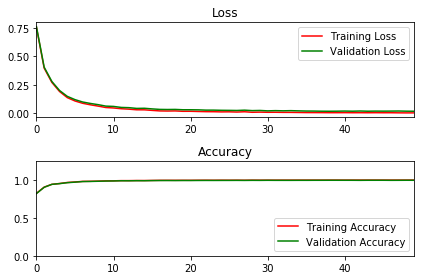

In [16]:
# Train and validate our model
epochs = []
train_loss = []
valid_loss = []
train_accuracy = []
valid_accuracy = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # initialize the tensor variables. 
    num_examples = len(X_train) # number of examples in the training data
    
    # shuffle training data
    # its important to shuffle the training data otherwise the ordering of data might have huge effect on how well the model trains
    X_train, y_train = shuffle(X_train, y_train)

    
    print("Training...")
    print()
    max_accuracy = 0
    for i in range(EPOCHS): # train the model for EPOCHS number of iterations
        total_accuracy = 0
        total_loss = 0
        X_train, y_train = shuffle(X_train, y_train) # shuffle the training data to ensure that our training isn't biased by the
        # order of the images. 
        
        # now we break up our training data into batches and train the model on each batch 
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation,feed_dict={x: batch_x, y: batch_y, dropout: 0.5})

          
        # at the end of each epoch, we evaluate the model on our validation data 
        training_loss, training_accuracy = evaluate(X_train, y_train, 1.0)
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid, 1.0)
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.3f}".format(training_loss))
        print("Training Accuracy = {:.2f}".format(training_accuracy*100))
        print()
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.2f}".format(validation_accuracy*100))
        print()
        epochs.append(i)
        train_loss.append(training_loss)
        valid_loss.append(validation_loss)
        train_accuracy.append(training_accuracy)
        valid_accuracy.append(validation_accuracy)
        if max_accuracy < validation_accuracy: # we save the model having maximum accuracy on validation data
            max_accuracy = validation_accuracy # so, we can load up later and modify it or evaluate the model on test dataset
            saver.save(sess, './LeNet.ckpt')
            print("Best model saved")
        print()
        print()

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(epochs, train_loss, 'r', label='Training Loss')
loss_plot.plot(epochs, valid_loss, 'g', label='Validation Loss')
loss_plot.set_xlim([epochs[0], epochs[-1]])
loss_plot.legend(loc=1)
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
acc_plot.plot(epochs, valid_accuracy, 'g', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.25])
acc_plot.set_xlim([epochs[0], epochs[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

In [17]:
# print validation accuracy of the best model
print("Validation Accuracy = {:.2f}".format(max_accuracy*100))

Validation Accuracy = 99.60


### Load Best Model and Test using Testing Data

In [18]:
save_file = './LeNet.ckpt'
with tf.Session() as sess:
    saver.restore(sess, save_file)
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, dropout: 1.0})

print('Test Accuracy = {:.2f}'.format(accuracy*100))

INFO:tensorflow:Restoring parameters from ./LeNet.ckpt
Test Accuracy = 99.53


## Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [19]:
input = 'test_images/*.jpg'
name = glob.glob(input)
X_new = [ ]
y_new = [ ]
for image in name:  
    #print(image)
    img_name = image.split('_')[2] 
    label = img_name.split('.')[0] 
    y_new.append(np.uint8(label))
    img = mpimg.imread(image)
    X_new.append(img)

X_new = np.array(X_new)
y_new = np.array(y_new)

# conver to gray scale
X_new = color_2_grayscale(X_new)
# normalize images
X_new = normalize_grayscale(X_new)
print('Shape of New Images')
print(X_new.shape)
print()
print('List of Labels of New Images')
print(y_new)

Shape of New Images
(10, 32, 32, 1)

List of Labels of New Images
[34 17 13 18 12 36 14 16 26 15]


### Predict the Sign Type for Each Image

In [20]:
save_file = './LeNet.ckpt'
with tf.Session() as sess:
    saver.restore(sess, save_file)
    labels = sess.run(logits, feed_dict={x: X_new, y: y_new, dropout: 1.0})

for i in range(10):
    print('Actual Label is', y_new[i], 'and Predicted Label is', np.argmax(labels[i]))

INFO:tensorflow:Restoring parameters from ./LeNet.ckpt
Actual Label is 34 and Predicted Label is 34
Actual Label is 17 and Predicted Label is 17
Actual Label is 13 and Predicted Label is 13
Actual Label is 18 and Predicted Label is 18
Actual Label is 12 and Predicted Label is 12
Actual Label is 36 and Predicted Label is 36
Actual Label is 14 and Predicted Label is 14
Actual Label is 16 and Predicted Label is 16
Actual Label is 26 and Predicted Label is 26
Actual Label is 15 and Predicted Label is 8


### Accuracy of Model on New Test Images

In [21]:
### Calculate the accuracy for new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, save_file)
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_new, y: y_new, dropout: 1.0})

print('Accuracy of Prediction for New Images = {:.2f}'.format(accuracy*100))

INFO:tensorflow:Restoring parameters from ./LeNet.ckpt
Accuracy of Prediction for New Images = 90.00


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    saver.restore(sess, save_file)
    labels = sess.run(logits, feed_dict={x: X_new, y: y_new, dropout: 1.0})
    top_five_prob = sess.run(tf.nn.top_k(tf.nn.softmax(labels), k=5))

np.set_printoptions(precision=2, suppress=True)
for i in range(top_five_prob[0].shape[0]):
    print('Top 5 Softmax Probabilies and their Labels for Image with Label', y_new[i])
    print(top_five_prob[0][i] * 100)
    print(top_five_prob[1][i])
    print()

INFO:tensorflow:Restoring parameters from ./LeNet.ckpt
Top 5 Softmax Probabilies and their Labels for Image with Label 34
[ 100.    0.    0.    0.    0.]
[34  3 41 17 35]

Top 5 Softmax Probabilies and their Labels for Image with Label 17
[ 91.01   7.23   1.76   0.     0.  ]
[17 34  9 35 33]

Top 5 Softmax Probabilies and their Labels for Image with Label 13
[ 100.    0.    0.    0.    0.]
[13 15 35  2 38]

Top 5 Softmax Probabilies and their Labels for Image with Label 18
[ 92.77   7.23   0.     0.     0.  ]
[18 26 24 40 37]

Top 5 Softmax Probabilies and their Labels for Image with Label 12
[ 100.    0.    0.    0.    0.]
[12 42 38 14 35]

Top 5 Softmax Probabilies and their Labels for Image with Label 36
[100.   0.   0.   0.   0.]
[36 38 32 17  3]

Top 5 Softmax Probabilies and their Labels for Image with Label 14
[ 99.48   0.47   0.03   0.02   0.  ]
[14 34 13 22 35]

Top 5 Softmax Probabilies and their Labels for Image with Label 16
[ 90.95   8.84   0.21   0.     0.  ]
[16 10  7 42

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 